# Linear SVM Classification

## Soft Margin Classification

In [7]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica

svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42),
)

svm_clf.fit(X, y)

/home/julio/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

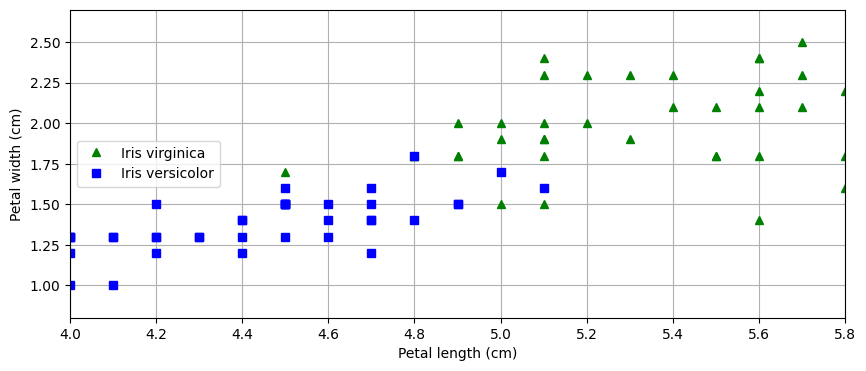

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^", label="Iris virginica")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Iris versicolor")

plt.axis([4.0, 5.8, 0.8, 2.7])
plt.legend(loc="center left")
plt.grid()
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.show()

In [9]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [10]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

# Nonlinear SVM Classification

In [11]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42),
)
polynomial_svm_clf.fit(X, y)

/home/julio/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

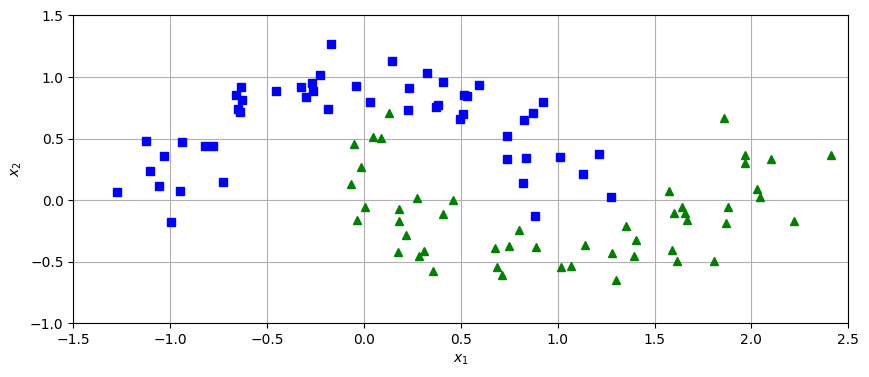

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")

axis = [-1.5, 2.5, -1.0, 1.5]
plt.axis(axis)
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## Polynomial Kernel

In [13]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5),
)
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

## Gaussian RBF Kernel

In [14]:
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=0.001),
)
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

# SVM Regression

## Linear

In [15]:
from sklearn.svm import LinearSVR
import numpy as np

np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector
y = y.ravel()

epsilon = 0.5

svm_reg = make_pipeline(
    StandardScaler(),
    LinearSVR(epsilon=epsilon, random_state=42),
)
svm_reg.fit(X, y)

/home/julio/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [16]:
X_new = np.array([[0], [2]])
y_predicted = svm_reg.predict(X_new)
y_predicted

array([4.07217776, 9.56922201])

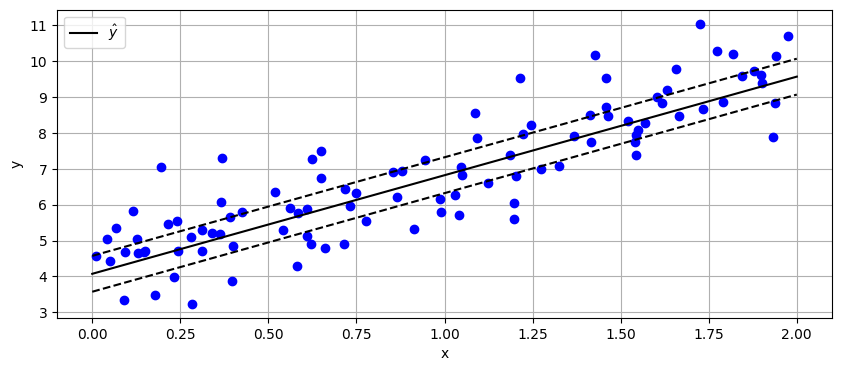

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(X, y, "bo")
plt.plot(X_new, y_predicted, "k-", label="$\hat{y}$")
plt.plot(X_new, y_predicted + epsilon, "k--")
plt.plot(X_new, y_predicted - epsilon, "k--")


plt.legend(loc="upper left")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Nonlinear

In [95]:
from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = (0.5 * (X ** 2)) + X + 2 + np.random.randn(m, 1)
y = y.ravel()

epsilon = 1

svm_poly_reg = make_pipeline(
    StandardScaler(),
    SVR(kernel="poly", degree=2, C=1, epsilon=epsilon),
)
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, degree=2, epsilon=1, kernel='poly'))])

In [99]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_predicted = svm_poly_reg.predict(X_new)
y_predicted

array([6.32592615, 6.11709106, 5.91279115, 5.7130264 , 5.51779683,
       5.32710243, 5.1409432 , 4.95931915, 4.78223026, 4.60967655,
       4.441658  , 4.27817463, 4.11922643, 3.9648134 , 3.81493554,
       3.66959285, 3.52878534, 3.39251299, 3.26077582, 3.13357382,
       3.01090699, 2.89277533, 2.77917884, 2.67011752, 2.56559138,
       2.4656004 , 2.3701446 , 2.27922397, 2.19283851, 2.11098822,
       2.0336731 , 1.96089315, 1.89264838, 1.82893877, 1.76976434,
       1.71512508, 1.66502099, 1.61945207, 1.57841832, 1.54191975,
       1.50995634, 1.48252811, 1.45963505, 1.44127716, 1.42745444,
       1.41816689, 1.41341451, 1.41319731, 1.41751527, 1.42636841,
       1.43975672, 1.4576802 , 1.48013885, 1.50713267, 1.53866166,
       1.57472583, 1.61532516, 1.66045967, 1.71012935, 1.7643342 ,
       1.82307422, 1.88634941, 1.95415978, 2.02650531, 2.10338602,
       2.1848019 , 2.27075295, 2.36123917, 2.45626056, 2.55581712,
       2.65990886, 2.76853576, 2.88169784, 2.99939509, 3.12162

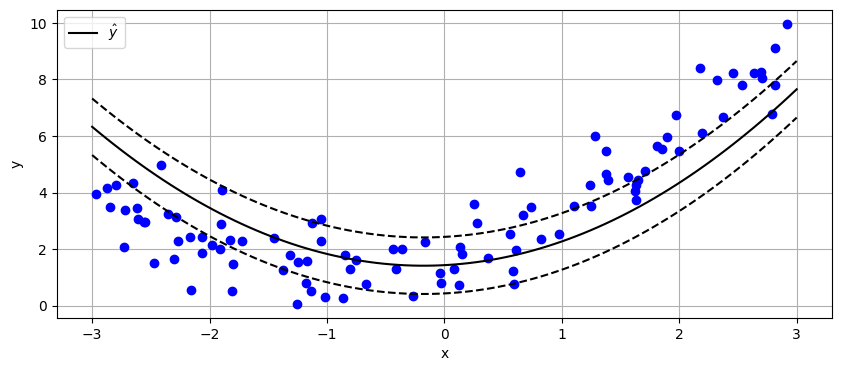

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(X, y, "bo")
plt.plot(X_new, y_predicted, "k-", label="$\hat{y}$")
plt.plot(X_new, y_predicted + epsilon, "k--")
plt.plot(X_new, y_predicted - epsilon, "k--")


plt.legend(loc="upper left")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()